## Modelowanie Wieloagentowe

## 2021/2022, semestr zimowy, studia sobotnio-niedzielne

## Uladzislau Darhevich 108519

[kontakt](mailto:ud108519@student.sgh.waw.pl)

In [1]:
using Statistics
using PyCall
using Random
using Plots
using Distributions
using HypothesisTests
using Printf
Random.seed!(1234)

MersenneTwister(1234)

1. Napisz funkcję `f(x, y)`, która liczy średnią liczb od `1` do `x` ze skokiem `y`. Uruchom tę funkcję dla `x=numeryczna_część_numeru_indeksu` i `y=1/numeryczna_część_numeru_indeksu`

In [2]:
function f(x,y)
    return mean(1:y:x)
end

f (generic function with 1 method)

In [3]:
n_index = 108519
res_julia = f(n_index, 1/n_index)
res_julia

54260.0

2. Wylosuj 1000 liczb ze standardowego rozkładu normalnego. Narysuj ich histogram:

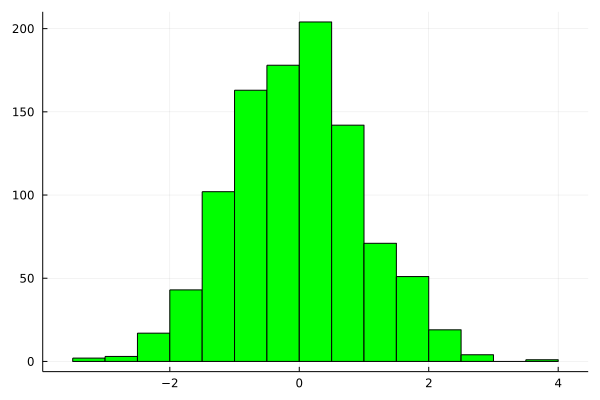

In [4]:
histogram(randn(1000), legend=false, color="lime")

3. Wylosuj 20 liczb z rozkładu jednostajnego na przedziale [0,1]. Wyznacz 95% przedział ufności dla średniej tych liczb
dla 10000 powtórzeń próby bootstrapowej.

In [5]:
function f3(r, q)
# r - ilość powtórzeń , q - ilość liczb losowanych
    s = [mean(rand(q)) for _ in 1:r]
    m = mean(s)
    sd = std(s)
    ci_low = m - 1.96 * sd / sqrt(r)
    ci_high = m + 1.96 * sd / sqrt(r)
    @printf("Przedział ufności:\nDolna granica %s\nGórna granica %s\n", ci_low, ci_high)
end

# za pomocą Distributions i HypothesisTests    
function f3_adv(r, q)
# r - ilość powtórzeń , q - ilość liczb losowanych
    s = [mean(rand(q)) for _ in 1:r]
    ci = confint(OneSampleTTest(s))
    @printf("Przedział ufności:\nDolna granica %s\nGórna granica %s", ci[1], ci[2])
end

f3_adv (generic function with 1 method)

In [6]:
f3(10000, 20), f3_adv(10000, 20)

Przedział ufności:
Dolna granica 0.4975784947315824
Górna granica 0.5001249449419781
Przedział ufności:
Dolna granica 0.49898956244991544
Górna granica 0.5015356111518545

(nothing, nothing)

4. Biorąc przykład z zadania 3 napisz funkcję, której parametrem będzie wielkość próby `n` a wynikiem szerokość przedziału ufności.
Narysuj wykres zależności szerokości przedziału ufności od `n`, gdzie `n` przyjmuje wartości od `10` do `100` z krokiem 1.

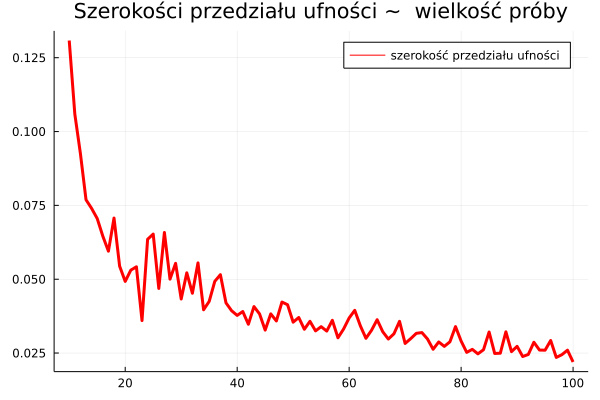

In [7]:
function f4(n)
# n - wielkość próby 
    s = [mean(rand(20)) for _ in 1:n]
    ci = confint(OneSampleTTest(s))
    return ci[2] - ci[1]
end

res = []
for i in (10:100)
    push!(res, f4(i))
end
plot(10:100, res, 
        title = "Szerokości przedziału ufności ~  wielkość próby", 
        label = "szerokość przedziału ufności", 
        lw = 3, 
        color="red")

5. Prowadzisz eksperyment, który zwraca 1 lub 0 jako wynik (np. klient kupił lub nie kupił produktu).
   Oblicz ile pomiarów należy wykonać, aby oszacować prawdopodobieństwo sukcesu z dokładnością +/- 0.05
   z prawdopodobieństwem 95%.
   Sprawdź symulacyjnie, czy wyliczona wartość jest prawidłowa.

In [28]:
function f5(p, N, w=0.05)
    """
    p - prawdopodobieństwo sukcesu
    N - początkowa wielkość próby
    w - dokładność
    """
    p = 0.5
    N = 100
    d = Binomial(1,p)
    v = rand(d, N)
    n = round(Int, 16*var(v) / w^2)
    return n
end

f5 (generic function with 2 methods)

In [29]:
n_probes = f5(0.5, 1000)
@printf("Należy wykonać nie mniej niz %s pomiarów", n_probes)

Należy wykonać nie mniej niz 1616 pomiarów

In [30]:
function f5_check(n, p)
    """
    n - wielkość próby
    p - prawdopodobieństwo sukcesu
    """
    v = rand(Binomial(1,p), n)
    ci = confint(OneSampleTTest(v))
    return ci[2] - ci[1]
end

f5_check (generic function with 1 method)

In [31]:
f5_check(n_probes, 0.5)

0.04880755987302249

In [32]:
f5_check(n_probes, 0.5) <= 0.05

true

6. Opisz na czym polega problem *exploration-exploitation* w testowaniu A/B

Kompromis eksploracja-eksploatacja jest dobrze znanym problemem występującym w scenariuszach, w których system uczący się musi wielokrotnie dokonywać wyboru o niepewnych korzyściach. Dylemat systemu decyzyjnego, który posiada jedynie niepełną wiedzę o zjawisku, polega na tym, czy powtarzać decyzje, które do tej pory się sprawdzały (exploitation), czy też podejmować nowe decyzje, mając nadzieję na uzyskanie jeszcze większych korzyści (exploration).

7. Opisz sposób działania próbkowania Thompsona w testowaniu A/B.

Próbkowanie Thompsona jest algorytmem dla problemów decyzyjnych online, gdzie działania są podejmowane sekwencyjnie w sposób, który musi równoważyć między wykorzystaniem tego, co jest znane, aby zmaksymalizować natychmiastową wydajność i inwestować, aby gromadzić nowe informacje, które mogą poprawić przyszłą wydajnoś (Kompromis eksploracja-eksploatacja). W klasycznych metodach, działania były wybierane na podstawie aktualnej średniej nagrody otrzymywanej za te działania. Próbkowanie Thompsona działa inaczej: zamiast udoskonalać przewidywania średniej nagrody, rozszerza je, aby skonstruować model probabilistyczny z otrzymanych nagród, a następnie wybrać działanie na jego podstawie.

8. Utwórz na GitHub nowe repozytorium. Do tego repozytorium stwórz jeden pull request i zrób jego merge.

![Pull request](Screenshot_1.jpg)